In [1]:
globalH = [0.192, 0.237, 0.392, 0.570, 0.443]
globalT = [3.474, 3.769, 4.741, 5.760, 5.198]
globalV = [0.083, 0.089, 0.113, 0.139, 0.125]
globalDeltaT = [0.060, 0.056, 0.044, 0.036, 0.040]
globalEp = [-0.820, -1.012, -1.675, -2.435, -1.892]
globakEk = [0.532, 0.635, 1.024, 1.550, 1.253]
globalEt = [0.002, 0.002, 0.003, 0.004, 0.003]
globalEr = [0.551, 0.534, 1.022, 1.546, 1.250]
g = 9.8

a1 = 0.034
a2 = 0.024


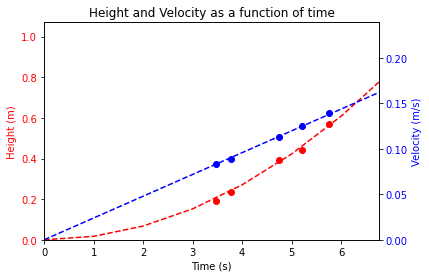

In [2]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

#data handler
def heightObjective(x, a):
    return 0.5 * a * x**2
def velocityObjective(x, a):
    return a * x

xTime = globalT[:]
yHeight = globalH[:]
yVelocity = globalV[:]

a1, _ = curve_fit(heightObjective, xTime, yHeight)
a2, _ = curve_fit(velocityObjective, xTime, yVelocity)
a1 = a1[0]
a2 = a2[0]
print('a1 = {0:.3f}'.format(a1))
print('a2 = {0:.3f}'.format(a2))

xLine = np.arange(0, max(xTime) + 2, 0.5)

#x-axis
figure, ax1 = plt.subplots()
ax1.set_xlabel('Time (s)')
ax1.axis([0, max(xTime)+ 1, 0, max(yHeight)+ 0.5])

ax1.set_ylabel('Height (m)', color='red')
ax1.scatter(xTime, yHeight, color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.axis([0, max(xTime)+1, 0, max(yVelocity)+ 0.1])

ax2.set_ylabel('Velocity (m/s)', color='blue')
ax2.scatter(xTime, yVelocity, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

xLine = np.arange(0, max(xTime)+2, 1)
heightLine = heightObjective(xLine, a1)
velocityLine = velocityObjective(xLine, a2)
plt.title('Height and Velocity as a function of time')
ax1.plot(xLine, heightLine, '--' ,color='red')
ax2.plot(xLine, velocityLine, '--' ,color='blue')

plt.show()

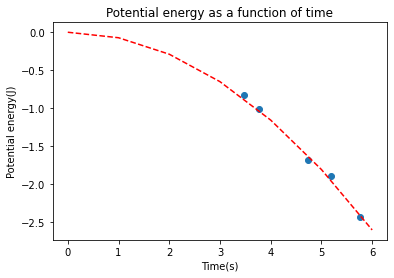

In [4]:
def objective(x, a):
	return -0.436 * 9.8 * 0.5 * a * x * x
x, y = globalT[:], globalEp[:]
# curve fit
popt, _ = curve_fit(objective, x, y)
a = popt
#a1 = popt1
# print("a2 = ", popt)
# plot input vs output
plt.scatter(x, y)

# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(0, max(x) + 1, 1)
# calculate the output for the range
y_line = objective(x_line, a)

#y1_line = objective(x_line, a1)
# Add title and axis names
plt.title('Potential energy as a function of time')
plt.xlabel('Time(s)')
plt.ylabel('Potential energy(J)')
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

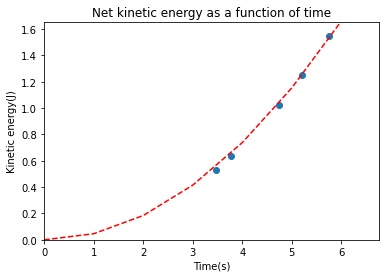

In [6]:
# define the true objective function
def objective(x, a):
	return 0.5 * 0.436 * a * a * x * x
 
x, y = globalT[:], globakEk[:]
# y1 = dataEk[:]
# curve fit
popt, _ = curve_fit(objective, x, y)
#popt1, _ = curve_fit(objective, x, y1)
# summarize the parameter values
a = popt
#a1 = popt1
# print("a2 = ", popt)
# plot input vs output
plt.scatter(x, y)
#pyplot.scatter(x, y1)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(0, max(x) + 2, 1)
plt.axis([0, max(x) + 1, 0, max(y) + 0.1])
# calculate the output for the range
y_line = objective(x_line, a)
#y1_line = objective(x_line, a1)
# Add title and axis names
plt.title('Net kinetic energy as a function of time')
plt.xlabel('Time(s)')
plt.ylabel('Kinetic energy(J)')
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

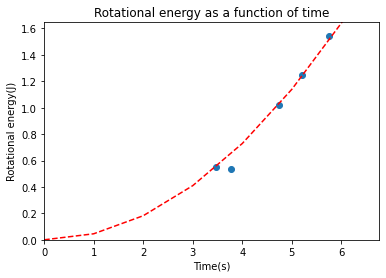

In [8]:
def objective(x, a):
	return 0.5 * 400 * 400 * 0.001 * a * a * x * x
x, y = globalT[:], globalEr[:]
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a = popt

# plot input vs output
plt.scatter(x, y)

# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(0, max(x)+2, 1)
# calculate the output for the range
y_line = objective(x_line, a)
plt.axis([0, max(x) + 1, 0, max(y) + 0.1])

# Add title and axis names
plt.title('Rotational energy as a function of time')
plt.xlabel('Time(s)')
plt.ylabel('Rotational energy(J)')
# create a line plot for the mapping function

plt.plot(x_line, y_line, '--', color='red')

plt.show()

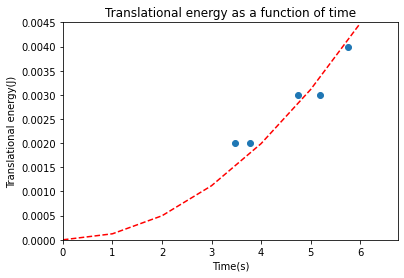

In [10]:
def objective(x, a):
	return  0.5 * 0.436 * a * a * x * x


x, y = globalT[:], globalEt[:]
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a = popt

# plot input vs output
plt.scatter(x, y)

# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(0, max(x) + 1, 1)
plt.axis([0, max(x) + 1, 0, max(y) + 0.0005])
# calculate the output for the range
y_line = objective(x_line, a)

# Add title and axis names
plt.title('Translational energy as a function of time')
plt.xlabel('Time(s)')
plt.ylabel('Translational energy(J)')
# create a line plot for the mapping function

plt.plot(x_line, y_line, '--', color='red')

plt.show()